In [2]:
# Insert code here.
# some first basic read ins to exoeriment
!pip install seaborn

     |████████████████████████████████| 283 kB 2.1 MB/s eta 0:00:01    |██▎                             | 20 kB 1.0 MB/s eta 0:00:01     |███████████████████████████▊    | 245 kB 2.1 MB/s eta 0:00:01
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import PowerTransformer
from sklearn.covariance import EmpiricalCovariance
import seaborn as sb

In [29]:
# read in some data
import data_fetching as data_fetching

x_train, y_train = data_fetching.get_train_data()
x_test = data_fetching.get_test_data()


### imputation

In [30]:
# Fill values to help outlier detection
# Use median as it

# impute the nans:
fill_NaN = SimpleImputer(missing_values=np.nan, strategy='median')
x_train = pd.DataFrame(fill_NaN.fit_transform(x_train))
x_test = pd.DataFrame(fill_NaN.fit_transform(x_test))

# Sanity Check
print(x_train.isnull().sum().sum())

0


### Outlier detection

In [60]:
import Normalisation as Normalisation
x_train = Normalisation.gaussian(x_train)
y_train = Normalisation.gaussian(y_train)
x_test = Normalisation.gaussian(x_test)
train_all = x_train.copy()
train_all['age'] = y_train
numpy_all = train_all.to_numpy()
numpy_test = x_test.to_numpy()


In [63]:
# fit a Minimum Covariance Determinant (MCD) robust estimator to data
#robust_cov = MinCovDet().fit(train_all)

# compare estimators learnt from the full data set with true parameters
#emp_cov = train_all.corr()
cov = EmpiricalCovariance().fit(numpy_test)
print(cov)
mahal = cov.mahalanobis(x_train)
print(np.shape(mahal))
print(np.max(mahal))
print(np.mean(mahal))
sb.boxplot(data=mahal)
i = np.where(np.asarray(mahal) > 20)
print(i)
print(train_all.iloc[i])
mahal_mean = np.mean(mahal)
mahal_std = np.std(mahal)
print('std')
print(mahal_std)
# get all id that have higher z score than alpha and remove them
j = np.where((np.asarray(mahal) - mahal_mean) / mahal_std > 3)
print(j)


EmpiricalCovariance()


ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 833 while Y.shape[1] == 832

EmpiricalCovariance()
(776,)
775.0000000000306
774.9999999999982
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168

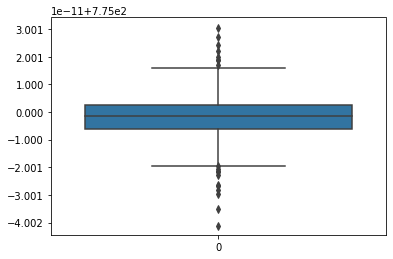

In [48]:
# fit a Minimum Covariance Determinant (MCD) robust estimator to data
#robust_cov = MinCovDet().fit(train_all)

# compare estimators learnt from the full data set with true parameters
#emp_cov = train_all.corr()
cov = EmpiricalCovariance().fit(numpy_test)
print(cov)
mahal = cov.mahalanobis(x_test)
print(np.shape(mahal))
print(np.max(mahal))
print(np.mean(mahal))
sb.boxplot(data=mahal)
i = np.where(np.asarray(mahal) > 20)
print(i)
print(train_all.iloc[i])
mahal_mean = np.mean(mahal)
mahal_std = np.std(mahal)
print('std')
print(mahal_std)
# get all id that have higher z score than alpha and remove them
j = np.where((np.asarray(mahal) - mahal_mean) / mahal_std > 5)
print(j)


In [10]:
print(np.shape(x_train))
x_train = x_train.drop(x_train.index[j])
print(np.shape(x_train))



(1212, 833)
(1207, 833)


In [53]:
from sklearn.cluster import DBSCAN
import Normalisation as Normalisation
train_all = Normalisation.gaussian(train_all)
numpy_test_all = train_all.to_numpy()
clustering = DBSCAN(eps=35, min_samples=5).fit(numpy_test_all)
labels = clustering.labels_
outliers = np.where(np.asarray(labels)==-1)
print(outliers)
print(np.shape(outliers))


(array([   5,   20,   26,   28,   43,   50,   52,   56,   63,   64,   69,
         90,   91,   93,   97,  108,  111,  112,  113,  122,  123,  128,
        130,  144,  149,  167,  187,  210,  217,  220,  247,  250,  262,
        266,  270,  284,  298,  302,  304,  305,  308,  316,  334,  351,
        352,  383,  384,  417,  418,  420,  421,  422,  426,  429,  431,
        432,  449,  475,  477,  480,  484,  496,  497,  499,  506,  512,
        526,  537,  554,  557,  558,  562,  568,  574,  576,  597,  616,
        618,  619,  626,  633,  634,  644,  689,  694,  701,  703,  748,
        750,  751,  756,  759,  775,  777,  784,  830,  850,  855,  856,
        875,  878,  885,  889,  893,  902,  929,  934,  938,  954,  962,
        979,  989,  990,  995, 1016, 1022, 1027, 1028, 1033, 1040, 1044,
       1049, 1050, 1057, 1058, 1060, 1061, 1077, 1090, 1096, 1097, 1100,
       1102, 1117, 1120, 1148, 1150, 1158, 1166, 1178, 1211]),)
(1, 141)


In [37]:

from sklearn.cluster import DBSCAN
import Normalisation as Normalisation
test_gaussian = Normalisation.gaussian(x_test)
numpy_test_gaussian = test_gaussian.to_numpy()
clustering = DBSCAN(eps=36, min_samples=5).fit(numpy_test_gaussian)
labels = clustering.labels_
outliers = np.where(np.asarray(labels)==-1)
print(outliers)
print(np.shape(outliers))


(array([  0,   1,   4,   5,   6,   7,   8,   9,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  21,  24,  26,  28,  29,  32,  33,  34,  36,
        37,  39,  40,  41,  43,  44,  46,  47,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  61,  64,  65,  66,  67,  70,  71,  72,
        73,  75,  76,  79,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  95,  96,  98,  99, 101, 102, 103, 104, 106,
       107, 109, 110, 111, 112, 114, 115, 116, 117, 119, 121, 123, 124,
       125, 126, 127, 128, 130, 132, 135, 136, 137, 138, 139, 140, 141,
       142, 144, 145, 147, 149, 150, 151, 152, 154, 155, 156, 159, 160,
       164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 177, 178, 179,
       180, 183, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 197,
       198, 199, 200, 202, 204, 206, 207, 209, 212, 213, 214, 215, 217,
       219, 220, 221, 222, 224, 227, 228, 230, 231, 235, 237, 238, 239,
       240, 241, 242, 243, 244, 245, 246, 247, 248, 250, 253, 2

In [58]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=10, warm_start=True)
clf.fit(train_all)  # fit 10 trees  
clf.set_params(n_estimators=20)  # add 10 more trees  
clf.fit(train_all)
labels = clf.predict(train_all)
outliers = np.where(np.asarray(labels)==-1)
print(outliers)
print(np.shape(outliers))


(array([   3,  142,  144,  153,  154,  221,  231,  338,  354,  397,  404,
        425,  501,  634,  911,  961, 1061, 1063, 1086, 1130, 1181, 1197,
       1207]),)
(1, 23)


In [59]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=10, warm_start=True)
clf.fit(test_all)  # fit 10 trees  
clf.set_params(n_estimators=20)  # add 10 more trees  
clf.fit(test_all)
labels = clf.predict(test_all)
outliers = np.where(np.asarray(labels)==-1)
print(outliers)
print(np.shape(outliers))


(array([309, 755]),)
(1, 2)


In [ ]:
# check for critical value:
from scipy.stats import chi2
chi2.ppf((1-0.01), df=832)

929.8273106833801

In [ ]:
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

          x0             x1            x2           x3            x4  \
0  10.891876  832442.812375  20585.544083  1028.369495  1.163780e+06   
1  11.512994  832442.898114           NaN  1012.624877  1.028911e+06   
2  11.052185  832442.896307  20585.512844  1003.953827  9.231756e+05   
3  11.642076            NaN           NaN  1004.672084  9.459461e+05   
4  10.407121  832442.831424  20585.557007          NaN  9.957182e+05   

          x5             x6            x7            x8             x9  ...  \
0   9.199135  597900.477629           NaN  1.144294e+06  785176.201298  ...   
1  10.906408  597900.458612   8127.016078  1.099166e+06  785176.258299  ...   
2   9.212979  597900.426764  10738.092422  1.027863e+06  785176.223468  ...   
3   9.553420  597900.450367  13524.096973  1.168144e+06  785176.254867  ...   
4   8.419164  597900.423639  12894.065081  1.063199e+06  785176.190880  ...   

          x823          x824       x825       x826         x827       x828  \
0  -855.549602

In [ ]:
# there are 1175 correlations > 0.9 (absolute) (diag has to be taken away: 171 single correlations! rro
for i in range(0,832):
    print(i)
    C_mat = train_all[i, 'age'].corr()
print(C_mat)
#high_corr_mask = (abs(C_mat)>0.9)
#print(high_corr_mask.sum().sum())


0


KeyError: (0, 'age')

In [ ]:
print(x_train.mean(axis=0))

0      1.002404e+01
1      8.324429e+05
2      2.058552e+04
3      1.048873e+03
4      1.000312e+06
           ...     
828    1.000806e+01
829    1.050204e+06
830    9.979875e+04
831    1.048981e+05
832    6.966584e+01
Length: 833, dtype: float64


In [ ]:
mean = x_train.mean(axis=0)


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional